In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('Hitters1.csv')

In [7]:
df.head()

,Price,Demand
0,3.0,6791
1,3.6,5988
2,40.0,354
3,21.0,651
4,4.0,7111


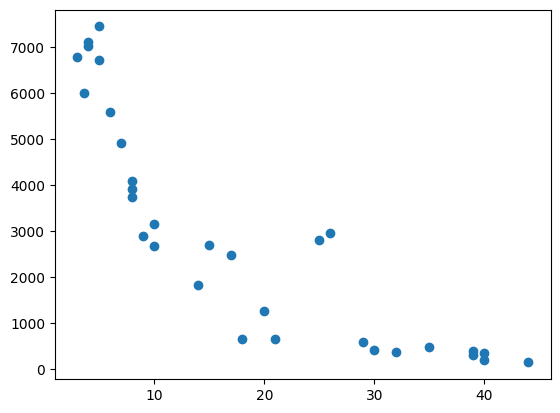

In [9]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values)
plt.show()

### We can see that the relationship is somewhat linear.We will transform the dataset

In [24]:
df['logPrice'] = np.log(df.iloc[:,0].values)
df['logDemand'] = np.log(df.iloc[:,1].values)

In [25]:
df.head()

,Price,Demand,logPrice,logDemand
0,3.0,6791,1.098612,8.823353
1,3.6,5988,1.280934,8.697513
2,40.0,354,3.688879,5.869297
3,21.0,651,3.044522,6.478510
4,4.0,7111,1.386294,8.869398


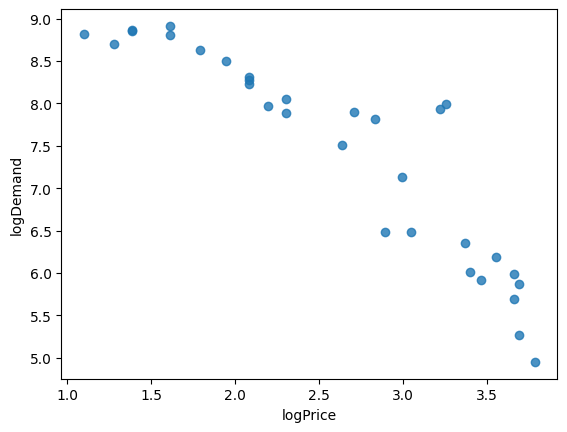

In [35]:
# plt.scatter(df.iloc[:,2].values,df.iloc[:,3].values)
# plt.show()
sns.regplot(x='logPrice',y='logDemand',data=df,fit_reg=False) #fit_reg=True shows the regressor line too
plt.show()

## We can implement linear regression using statsmodels as well as sklearn

# statsmodels implementation 

In [36]:
import statsmodels.formula.api as smf
import pandas.util.testing as tm

In [39]:
model1 = smf.ols(formula='logDemand ~ logPrice',data=df)  #ols - ordinary least square
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:              logDemand   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     140.9
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.18e-12
Time:                        20:32:47   Log-Likelihood:                -22.574
No. Observations:                  31   AIC:                             49.15
Df Residuals:                      29   BIC:                             52.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9053      0.307     35.486      0.0

# sklearn

In [53]:
from sklearn import linear_model as lm
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
reg_model = lm.LinearRegression()

In [55]:
reg_model.fit(df.iloc[:,2].values.reshape(-1,1),df.iloc[:,3].values)

LinearRegression()

In [56]:
print(reg_model.coef_)
print(reg_model.intercept_)

[-1.3303039]
10.905262254307303


In [57]:
df['pred_demand'] = reg_model.predict(df.iloc[:,2].values.reshape(-1,1))

In [58]:
df.head()

,Price,Demand,logPrice,logDemand,pred_demand
0,3.0,6791,1.098612,8.823353,9.443774
1,3.6,5988,1.280934,8.697513,9.201231
2,40.0,354,3.688879,5.869297,5.997932
3,21.0,651,3.044522,6.478510,6.855122
4,4.0,7111,1.386294,8.869398,9.061069


In [60]:
#Root mean squared error
r_m_s_e = np.sqrt(mean_squared_error(df.iloc[:,3].values.reshape(-1,1),df.iloc[:,4].values))
print(r_m_s_e)

0.5012075500059621


In [61]:
#r-square
r2 = r2_score(df.iloc[:,3].values.reshape(-1,1),df.iloc[:,4].values)
print(r2)

0.829319693343216
